**Object Detection**  
Object Detection is a computer vision task in which the goal is to detect and locate objects of interest in an image or video. The task involves identifying the position and boundaries of objects in an image, and classifying the objects into different categories.  


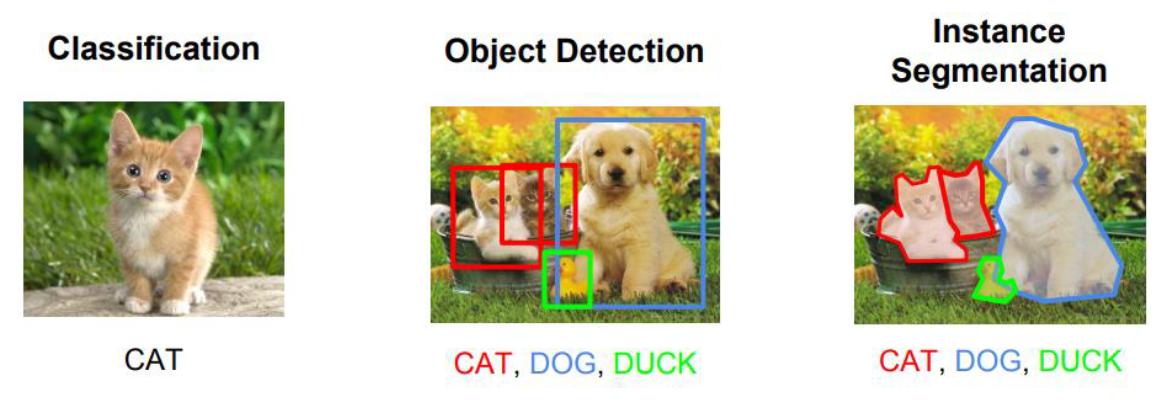

**Install Ultralytics library**

In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 18.3 MB/s eta 0:00:00


**Import Required Libraries**

In [4]:
import numpy as np
import PIL
import urllib
import matplotlib.pyplot as plt
from ultralytics import YOLO

**Load Pre-trained YOLO Model**

In [5]:
model = YOLO("yolov8n.pt")  # load a pretrained model

100%|██████████| 6.23M/6.23M [00:00<00:00, 118MB/s]


**Display Sample Images**

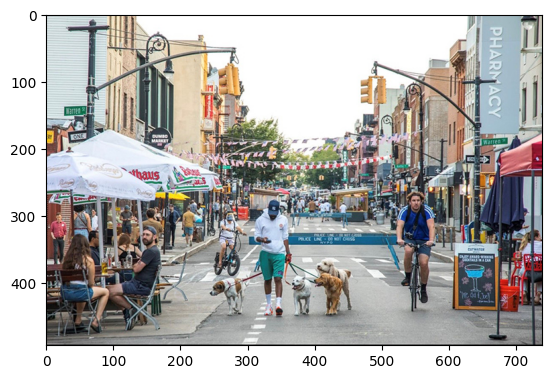

In [8]:
image_url = 'https://www.nyc.gov/html/dot/images/pedestrians/smith-st-open-streets.jpg'
image = urllib.request.urlopen(image_url)
image = PIL.Image.open(image)
image = np.array(image)

plt.imshow(image)

**Make predictions**

In [9]:
results = model.predict(image, save=True)


0: 448x640 11 persons, 2 bicycles, 1 bus, 4 dogs, 4 umbrellas, 2 chairs, 71.1ms
Speed: 3.1ms preprocess, 71.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


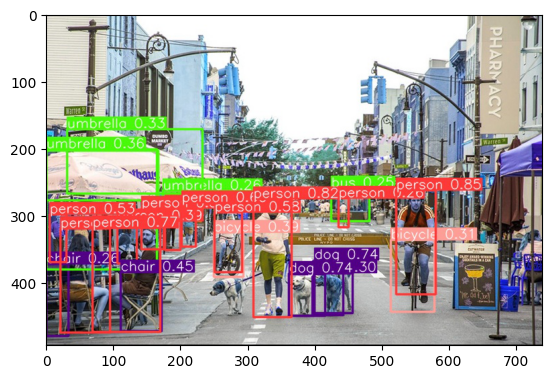

In [10]:
prediction_path = 'runs/detect/predict/image0.jpg'

prediction = np.array(PIL.Image.open(prediction_path))
plt.imshow(prediction)

**Train Your Custom Model**

In [ ]:
trained_model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
trained_model.train(data='coco128.yaml', epochs=3)  # train the model

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplif

In [ ]:
metrics = trained_model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                   all        128        929      0.726       0.55      0.647      0.484
                person        128        254       0.81      0.655      0.772       0.55
               bicycle        128          6          1       0.33      0.397      0.303
                   car        128         46      0.891      0.217       0.31      0.189
            motorcycle        128          5      0.764        0.8       0.92      0.732
              airplane        128          6      0.759      0.833      0.913      0.775
                   bus       